In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
# display all outputs in each cell, not just the last one

pd.set_option('display.max_columns', None)
# Show all columns
# To reset
# pd.reset_option('display.max_columns')


## Data Exploration and Cleaning

In [2]:
file_path = "./finance_economics_dataset.csv"

df = pd.read_csv(file_path)
col_description = {
    "Date": "The date of the financial data (YYYY-MM-DD)",
    "Stock Index": "The stock market index (S&P 500, NASDAQ, Dow Jones)",
    "Open Price": "Opening price of the stock market on the given day (USD)",
    "Close Price": "Closing price of the stock market on the given day (USD)",
    "Daily High": "Highest stock price reached during the day (USD)",
    "Daily Low": "Lowest stock price reached during the day (USD)",
    "Trading Volume": "Number of shares traded on that day",
    "GDP Growth": "Percentage change in Gross Domestic Product (GDP) (%)",
    "Inflation Rate": "Percentage change in the Consumer Price Index (CPI) (%)",
    "Unemployment Rate": "Percentage of unemployed individuals in the labor force (%)",
    "Interest Rate": "(%)",
    "Consumer Confidence Index": None,
    "Government Debt (Billion USD)": None,
    "Corporate Profits (Billion USD)": None,
    "Forex USD/EUR": None,
    "Forex USD/JPY": None,
    "Crude Oil Price": "(USD per Barrel)",
    "Gold Price": "(USD per Ounce)",
    "Real Estate Index": None,
    "Retail Sales": "(USD per Ounce)",
    "Bankruptcy Rate": "(%)",
    "Mergers & Acquisitions Deals": None,
    "Venture Capital Funding": "(Billion USD)",
    "Consumer Spending": None
}

df.head()
print(col_description["Date"])
print(col_description["Forex USD/EUR"])

,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),Interest Rate (%),Consumer Confidence Index,Government Debt (Billion USD),Corporate Profits (Billion USD),Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
0,2000-01-01,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,6.06,114,27271,1645,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3,76.64,4589
1,2000-01-02,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,2.19,101,16160,1008,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21,5.67,10101
2,2000-01-03,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,0.82,92,29962,4562,0.83,80.13,78.80,2339.49,439.46,340,0.79,48,39.43,13665
3,2000-01-04,Dow Jones,4625.02,4660.47,4665.26,4595.46,13098297,10.00,3.77,2.20,3.71,112,12745,4183,0.95,149.15,28.18,1308.54,213.07,8456,4.22,16,12.83,5192
4,2000-01-05,S&P 500,1998.18,1982.18,2044.31,1966.44,385306746,1.53,2.20,8.20,4.56,99,22293,3440,1.43,113.71,92.20,2210.08,405.49,1596,2.21,34,86.37,10688


The date of the financial data (YYYY-MM-DD)
None


In [3]:
df.info()
# If the data type of a column is not what you expect it to be, 
# this can often be a signal that the data needs cleaning.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date                                   3000 non-null   object 
 1   Stock Index                            3000 non-null   object 
 2   Open Price                             3000 non-null   float64
 3   Close Price                            3000 non-null   float64
 4   Daily High                             3000 non-null   float64
 5   Daily Low                              3000 non-null   float64
 6   Trading Volume                         3000 non-null   int64  
 7   GDP Growth (%)                         3000 non-null   float64
 8   Inflation Rate (%)                     3000 non-null   float64
 9   Unemployment Rate (%)                  3000 non-null   float64
 10  Interest Rate (%)                      3000 non-null   float64
 11  Cons

In [4]:
df.isnull().sum()
# seems no missing data (explicit NaN values)

# make a copy of current df
fe_df = df.copy()
fe_df.head()
fe_df.tail()

Date                                     0
Stock Index                              0
Open Price                               0
Close Price                              0
Daily High                               0
Daily Low                                0
Trading Volume                           0
GDP Growth (%)                           0
Inflation Rate (%)                       0
Unemployment Rate (%)                    0
Interest Rate (%)                        0
Consumer Confidence Index                0
Government Debt (Billion USD)            0
Corporate Profits (Billion USD)          0
Forex USD/EUR                            0
Forex USD/JPY                            0
Crude Oil Price (USD per Barrel)         0
Gold Price (USD per Ounce)               0
Real Estate Index                        0
Retail Sales (Billion USD)               0
Bankruptcy Rate (%)                      0
Mergers & Acquisitions Deals             0
Venture Capital Funding (Billion USD)    0
Consumer Sp

,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),Interest Rate (%),Consumer Confidence Index,Government Debt (Billion USD),Corporate Profits (Billion USD),Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
0,2000-01-01,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,6.06,114,27271,1645,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3,76.64,4589
1,2000-01-02,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,2.19,101,16160,1008,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21,5.67,10101
2,2000-01-03,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,0.82,92,29962,4562,0.83,80.13,78.80,2339.49,439.46,340,0.79,48,39.43,13665
3,2000-01-04,Dow Jones,4625.02,4660.47,4665.26,4595.46,13098297,10.00,3.77,2.20,3.71,112,12745,4183,0.95,149.15,28.18,1308.54,213.07,8456,4.22,16,12.83,5192
4,2000-01-05,S&P 500,1998.18,1982.18,2044.31,1966.44,385306746,1.53,2.20,8.20,4.56,99,22293,3440,1.43,113.71,92.20,2210.08,405.49,1596,2.21,34,86.37,10688


,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),Interest Rate (%),Consumer Confidence Index,Government Debt (Billion USD),Corporate Profits (Billion USD),Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
2995,2008-03-14,Dow Jones,1273.76,1235.44,1317.28,1192.34,86910001,8.84,7.00,10.44,7.29,117,10296,4236,1.18,113.52,61.98,2385.41,298.72,3033,8.75,35,66.01,2200
2996,2008-03-15,S&P 500,4589.59,4566.91,4607.56,4545.69,303579301,-1.88,9.15,5.61,8.46,78,16160,3079,1.17,147.10,31.61,2147.13,143.43,7950,5.07,18,25.49,5261
2997,2008-03-16,S&P 500,1477.52,1448.47,1523.86,1402.69,442387176,4.07,0.88,8.91,4.80,85,15186,1290,1.02,81.99,45.64,1943.61,105.81,3894,5.78,4,14.29,12039
2998,2008-03-17,NASDAQ,2311.37,2306.90,2346.30,2282.00,523425925,1.06,8.61,10.15,7.60,106,6495,1344,1.49,86.42,123.25,2211.40,236.07,2543,2.35,22,94.34,11979
2999,2008-03-18,NASDAQ,4262.98,4303.82,4316.68,4243.04,990814609,6.61,7.93,10.32,3.37,61,1069,4508,0.85,97.03,144.06,1225.09,201.82,4354,7.99,43,63.36,11220


In [5]:
# convert the object type of date to datetime
fe_df["Date"] = pd.to_datetime(fe_df["Date"])

# To check if this dataset includes all the entries between the starting date and the end
# get beginning and end of date range
min_dt = df.Date.min()
max_dt = df.Date.max()
print(min_dt)
print(max_dt)

expected_range = pd.date_range(start = min_dt, end = max_dt, freq='d' )
expected_range
# So there should be 3000 entries in this dataset

fe_df.shape
# which matches with the dataset shape

# Double check with difference method
missing_days = expected_range.difference(fe_df['Date'])
print(missing_days)

2000-01-01
2008-03-18


DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2008-03-09', '2008-03-10', '2008-03-11', '2008-03-12',
               '2008-03-13', '2008-03-14', '2008-03-15', '2008-03-16',
               '2008-03-17', '2008-03-18'],
              dtype='datetime64[ns]', length=3000, freq='D')

(3000, 24)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [6]:
# To make sure dataset is sorted by date in ascending order
fe_df = fe_df.sort_values(by="Date")
fe_df.reset_index(drop=True, inplace=True)  
#drop=True discards the current index, inplace=True applies changes to the fe_df
df.head(20)
df.columns

,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),Interest Rate (%),Consumer Confidence Index,Government Debt (Billion USD),Corporate Profits (Billion USD),Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
0,2000-01-01,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,6.06,114,27271,1645,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3,76.64,4589
1,2000-01-02,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,2.19,101,16160,1008,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21,5.67,10101
2,2000-01-03,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,0.82,92,29962,4562,0.83,80.13,78.80,2339.49,439.46,340,0.79,48,39.43,13665
3,2000-01-04,Dow Jones,4625.02,4660.47,4665.26,4595.46,13098297,10.00,3.77,2.20,3.71,112,12745,4183,0.95,149.15,28.18,1308.54,213.07,8456,4.22,16,12.83,5192
4,2000-01-05,S&P 500,1998.18,1982.18,2044.31,1966.44,385306746,1.53,2.20,8.20,4.56,99,22293,3440,1.43,113.71,92.20,2210.08,405.49,1596,2.21,34,86.37,10688
5,2000-01-06,S&P 500,2087.80,2124.76,2153.18,2085.18,82664194,1.42,6.08,3.24,1.09,88,15880,2525,1.39,140.00,60.23,2338.39,441.06,403,0.82,45,96.80,8613
6,2000-01-07,Dow Jones,4037.59,3996.40,4055.78,3948.97,653722138,7.64,6.24,4.52,8.24,91,17830,3318,0.92,138.80,29.30,1309.15,319.60,4874,9.55,31,32.63,1303
7,2000-01-08,NASDAQ,2798.96,2826.64,2864.47,2766.89,423890033,7.08,4.39,13.01,3.77,66,20092,2265,1.06,136.86,117.92,896.46,265.51,1011,7.33,37,98.89,3771
8,2000-01-09,Dow Jones,4106.84,4141.59,4154.46,4062.99,867172199,5.97,4.87,9.42,9.18,92,27069,1113,1.02,112.13,104.95,2358.55,479.46,5193,5.18,30,75.26,13164
9,2000-01-10,Dow Jones,1261.46,1229.64,1296.14,1195.84,174582201,1.95,9.60,10.24,1.97,98,3940,3306,0.90,142.71,123.15,1361.82,167.59,6147,7.43,24,0.22,13774


Index(['Date', 'Stock Index', 'Open Price', 'Close Price', 'Daily High',
       'Daily Low', 'Trading Volume', 'GDP Growth (%)', 'Inflation Rate (%)',
       'Unemployment Rate (%)', 'Interest Rate (%)',
       'Consumer Confidence Index', 'Government Debt (Billion USD)',
       'Corporate Profits (Billion USD)', 'Forex USD/EUR', 'Forex USD/JPY',
       'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)',
       'Real Estate Index', 'Retail Sales (Billion USD)',
       'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals',
       'Venture Capital Funding (Billion USD)',
       'Consumer Spending (Billion USD)'],
      dtype='object')

## Exploratory Data Analysis

In [7]:
sns.set_theme(style="white", palette="muted", context="talk")

# to make this dataframe a time-indexed dataframe
fe_df = fe_df.set_index("Date")

### Economics Indicator

##### GDP

<Figure size 1200x500 with 0 Axes>

<Axes: xlabel='Date', ylabel='GDP Growth (%)'>

Text(0.5, 1.0, 'Biweekly Average GDP Growth (%)')

Text(0, 0.5, 'GDP Growth (%)')

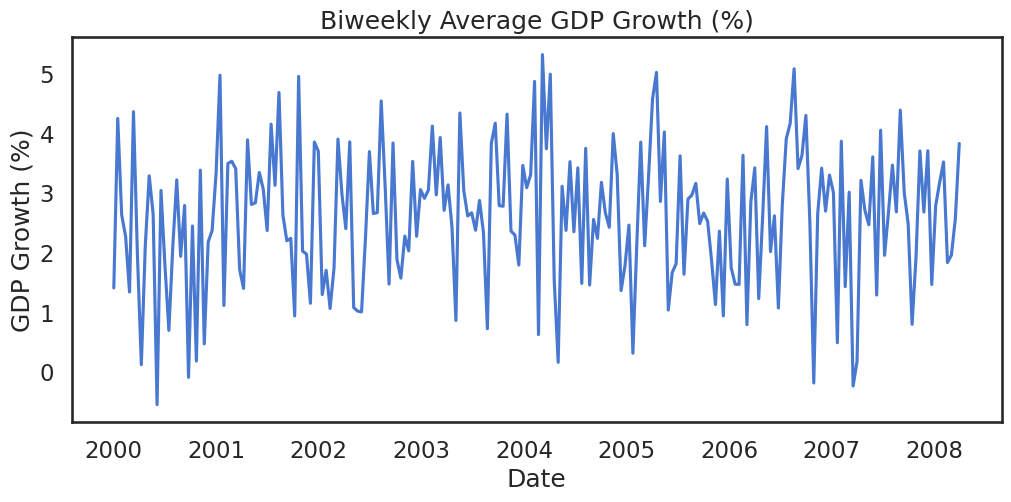

In [8]:
biweekly_gdp_avg = fe_df.resample('2W')["GDP Growth (%)"].mean().reset_index()

# can easily change the frequency to 2-month, 3-month, or 10-day intervals using offset aliases.
# fe_df.resample('<offset>').mean()
# | Alias  | Meaning                   | Example                                           |
# | ------ | ------------------------- | ------------------------------------------------- |
# | `'D'`  | 1 day                     | `'10D'` → every 10 days                           |
# | `'W'`  | 1 week                    | `'2W'` → every 2 weeks                            |
# | `'ME'`  | month end                 | `'2ME'` → every 2 months (end of every 2nd month)  |
# | `'MS'` | month start               | `'3MS'` → every 3 months, starting at month start |
# | `'QE'`  | quarter end               | `'QE'` or `'2QE'`                                   |
# | `'YE'`  | year end                  | `'YE'` = yearly                                    |


plt.figure(figsize=(12,5))
sns.lineplot(x="Date", y='GDP Growth (%)', data=biweekly_gdp_avg)
plt.title("Biweekly Average GDP Growth (%)")
plt.ylabel("GDP Growth (%)")
plt.show()

### Correlation Heatmap Between Indicators
Including correlation analysis of the data on a daily, monthly, and quarterly basis.

<Figure size 1600x1200 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix - Daily Basis')

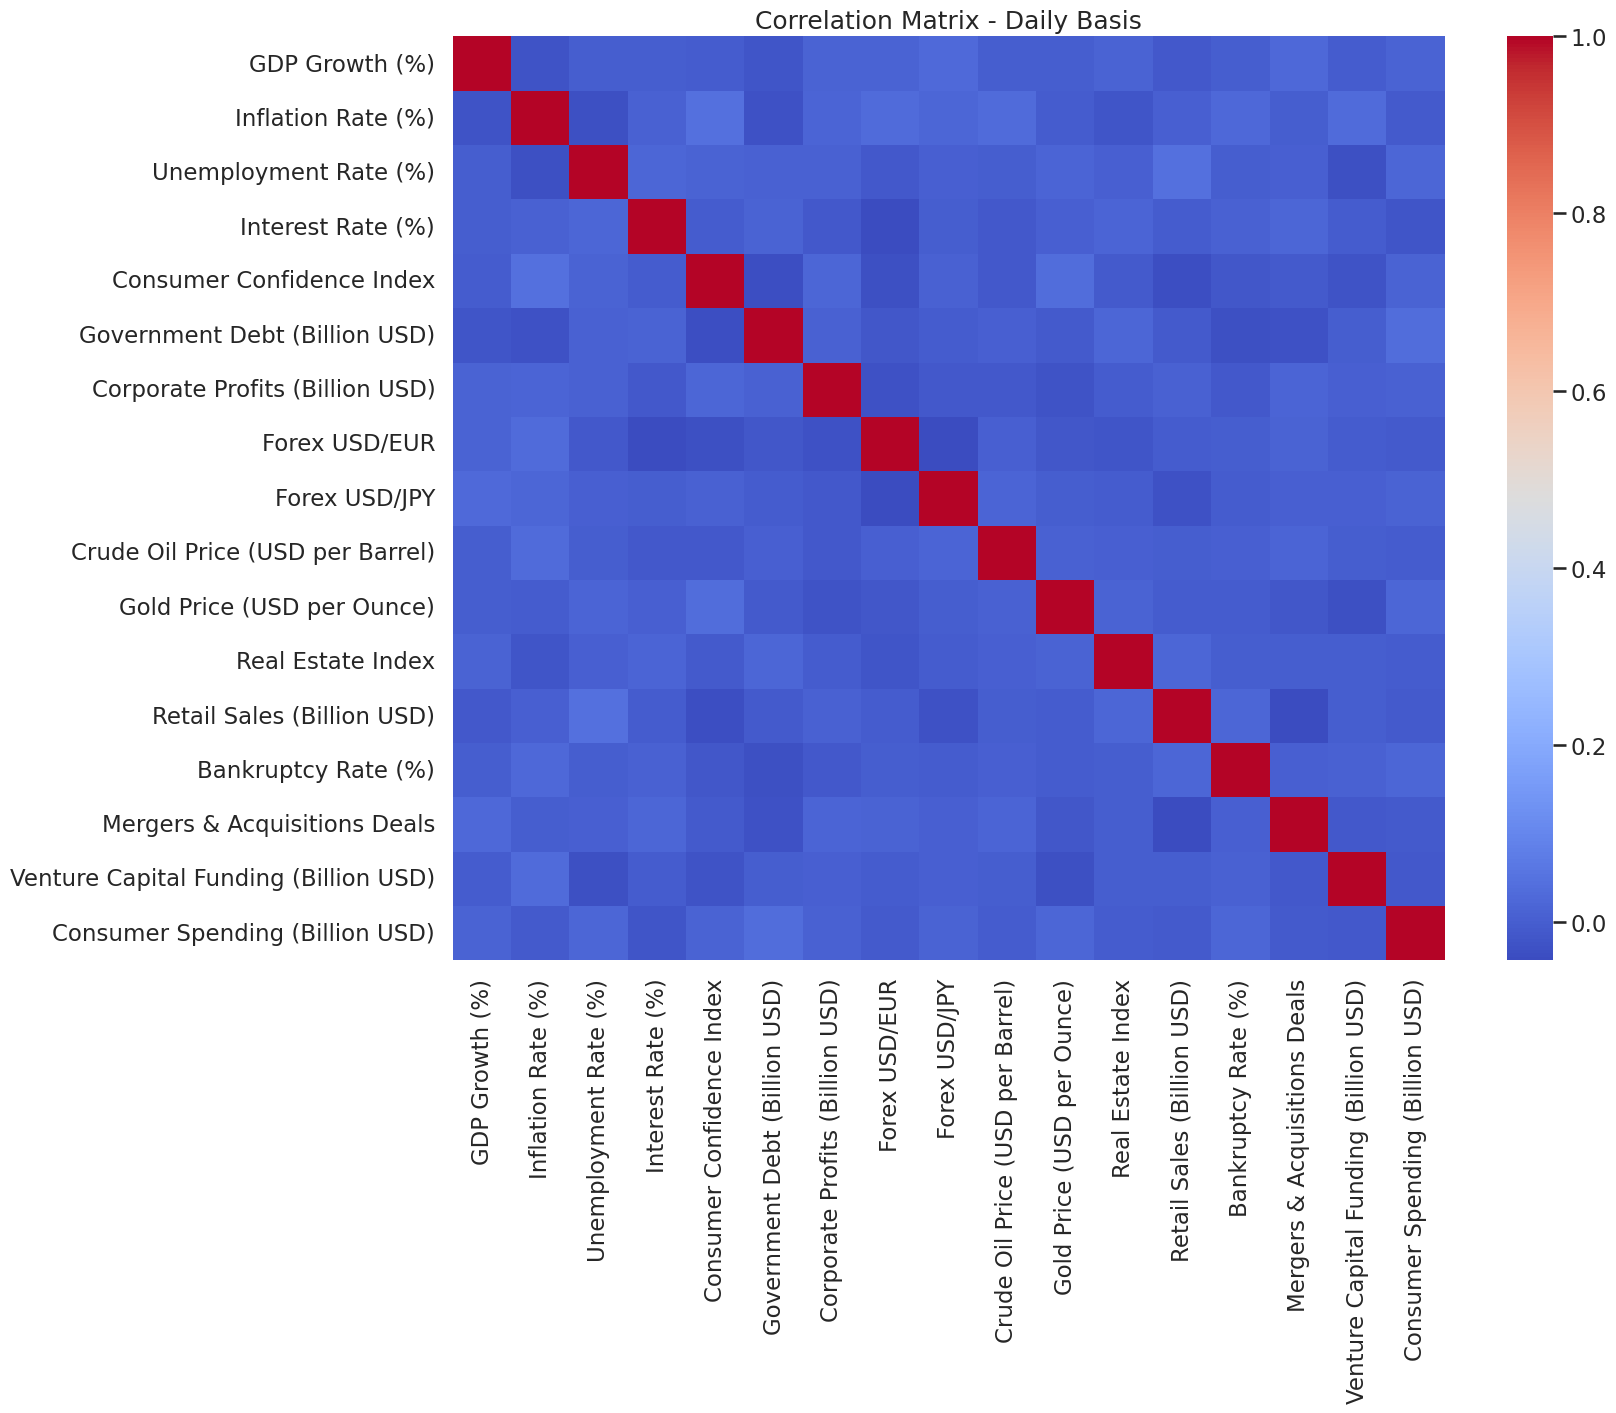

In [29]:
# Creating a correlation matrix Daily basis
correlation_matrix_daily = fe_df[['GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)',
                           'Interest Rate (%)', 'Consumer Confidence Index', 
                            'Government Debt (Billion USD)', 
                            'Corporate Profits (Billion USD)', 'Forex USD/EUR', 'Forex USD/JPY', 
                            'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)', 
                            'Real Estate Index', 'Retail Sales (Billion USD)', 
                            'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals', 
                            'Venture Capital Funding (Billion USD)', 
                            'Consumer Spending (Billion USD)']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix_daily, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Daily Basis')
plt.show()

<Figure size 1600x1200 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix - Biweekly Basis')

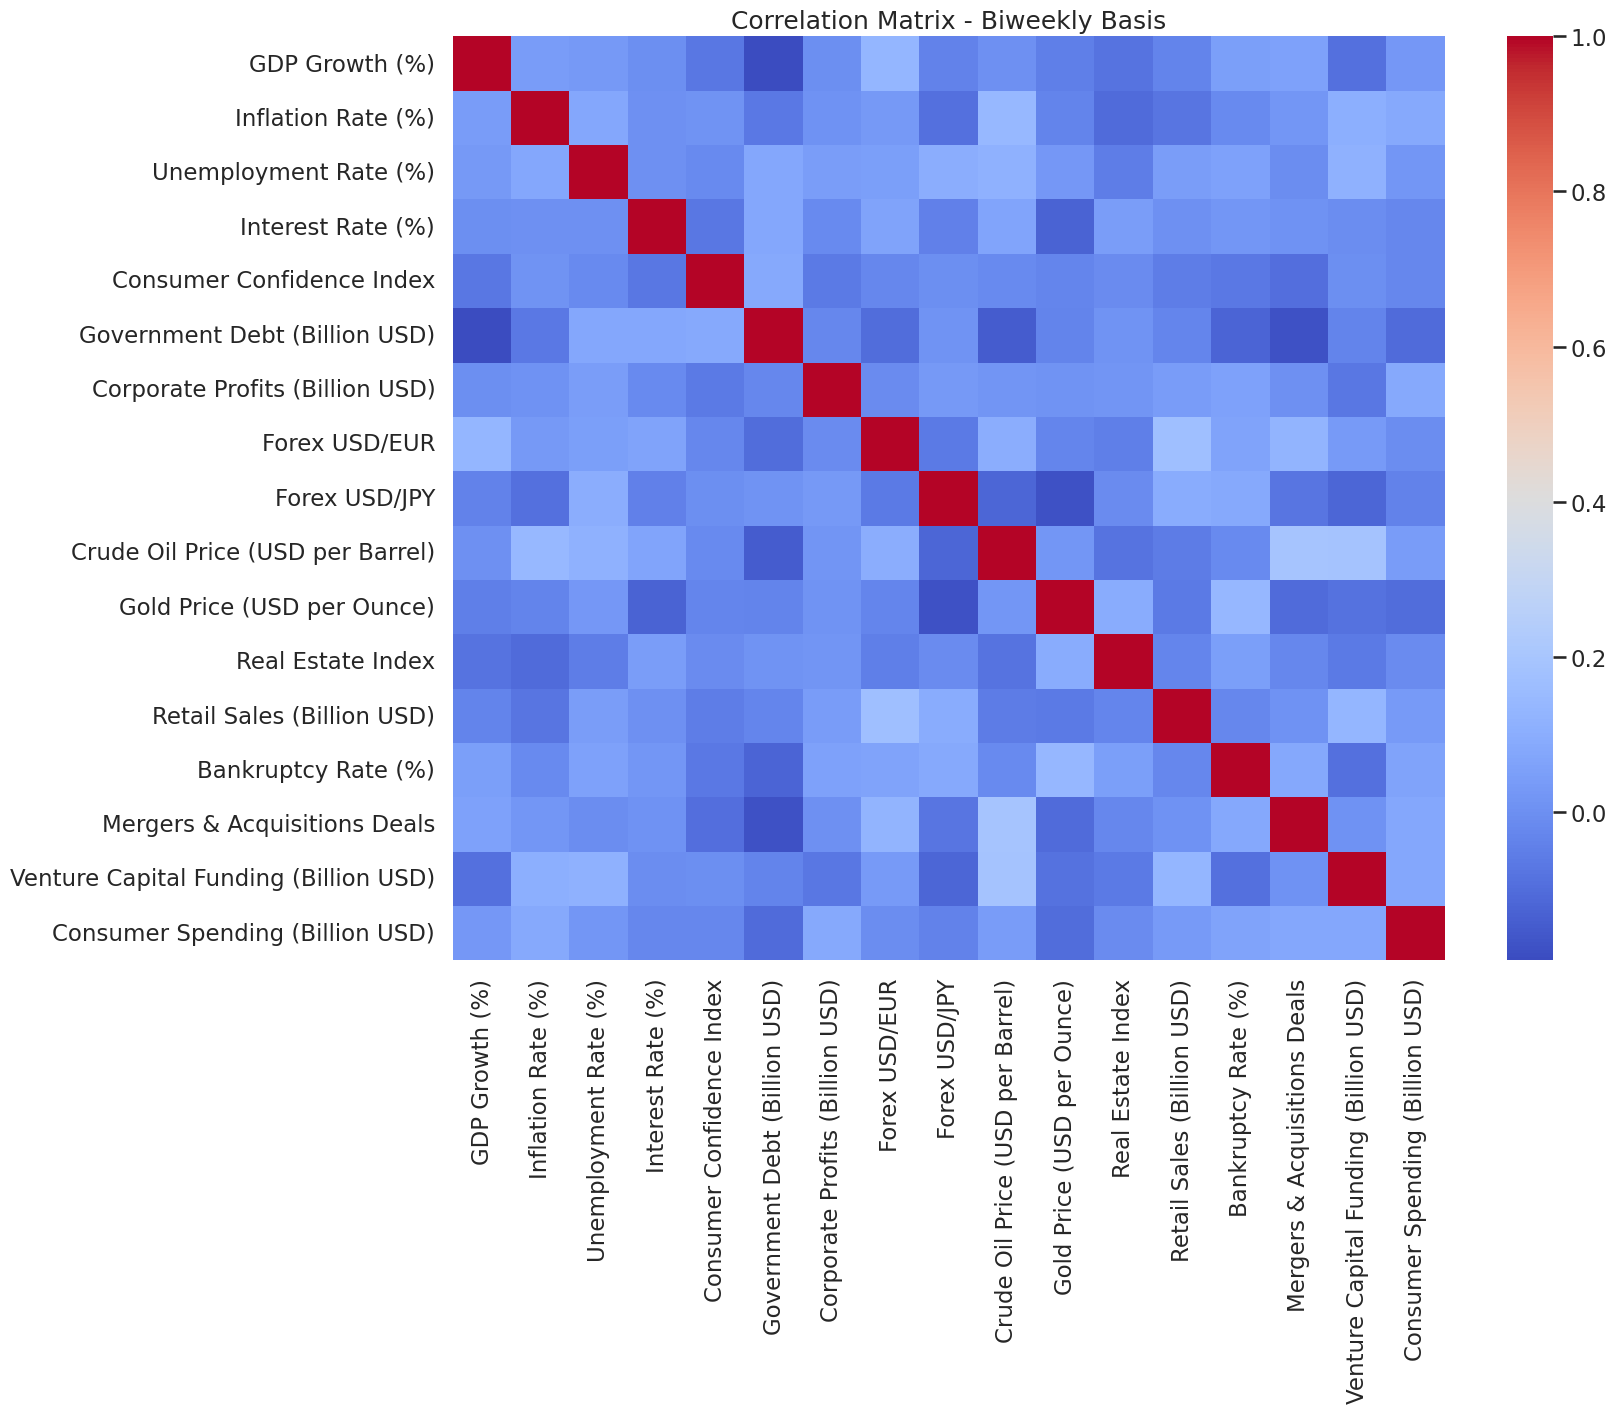

In [30]:
# Creating a correlation matrix Biweekly basis
biweekly_avg = fe_df.resample('2W')[['GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)',
                           'Interest Rate (%)', 'Consumer Confidence Index', 
                            'Government Debt (Billion USD)', 
                            'Corporate Profits (Billion USD)', 'Forex USD/EUR', 'Forex USD/JPY', 
                            'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)', 
                            'Real Estate Index', 'Retail Sales (Billion USD)', 
                            'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals', 
                            'Venture Capital Funding (Billion USD)', 
                            'Consumer Spending (Billion USD)']].mean().reset_index()

correlation_matrix_biweekly = biweekly_avg[['GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)',
                           'Interest Rate (%)', 'Consumer Confidence Index', 
                            'Government Debt (Billion USD)', 
                            'Corporate Profits (Billion USD)', 'Forex USD/EUR', 'Forex USD/JPY', 
                            'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)', 
                            'Real Estate Index', 'Retail Sales (Billion USD)', 
                            'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals', 
                            'Venture Capital Funding (Billion USD)', 
                            'Consumer Spending (Billion USD)']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix_biweekly, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Biweekly Basis')
plt.show()

<Figure size 1600x1200 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix - Monthly Basis')

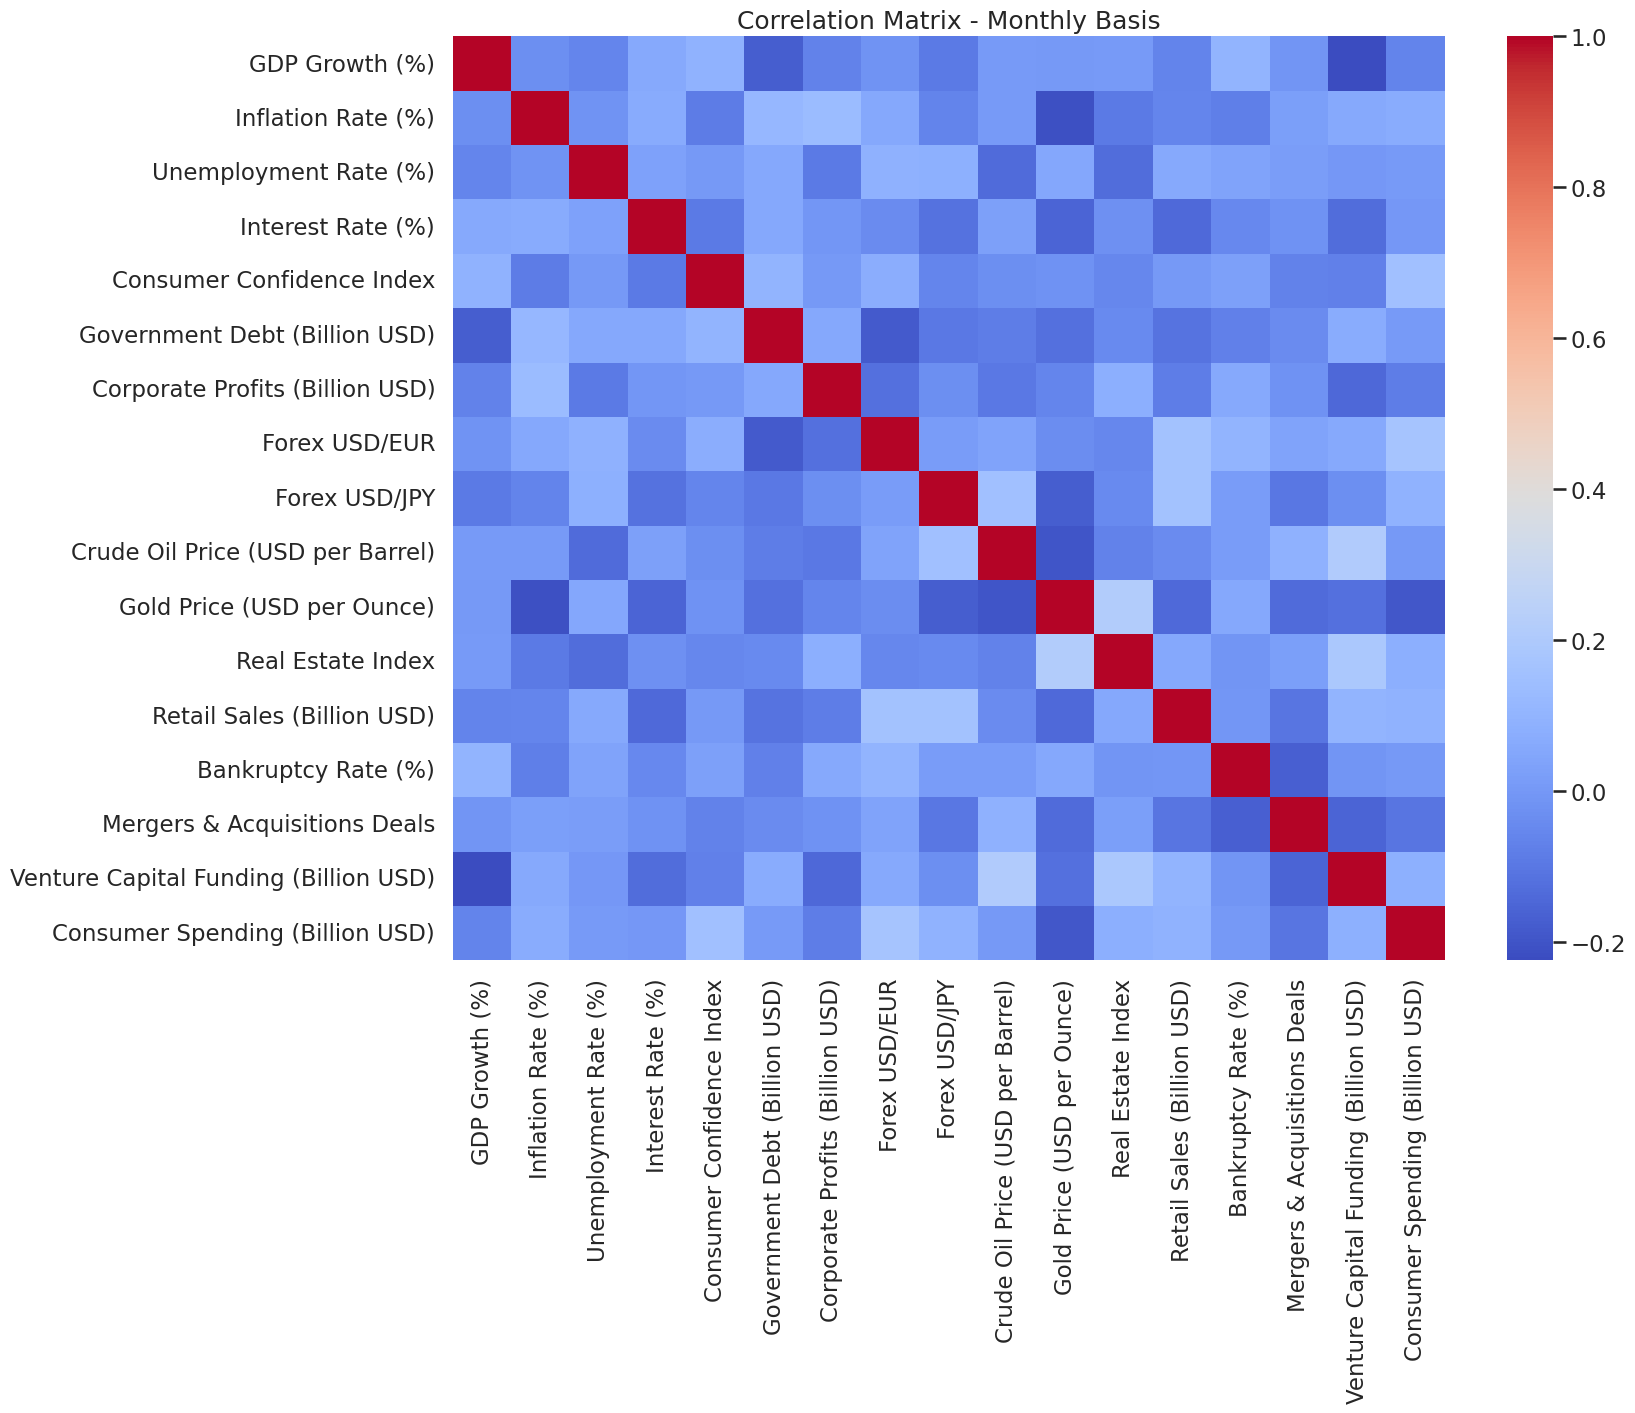

In [31]:
# Creating a correlation matrix Monthly basis
monthly_avg = fe_df.resample('ME')[['GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)',
                           'Interest Rate (%)', 'Consumer Confidence Index', 
                            'Government Debt (Billion USD)', 
                            'Corporate Profits (Billion USD)', 'Forex USD/EUR', 'Forex USD/JPY', 
                            'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)', 
                            'Real Estate Index', 'Retail Sales (Billion USD)', 
                            'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals', 
                            'Venture Capital Funding (Billion USD)', 
                            'Consumer Spending (Billion USD)']].mean().reset_index()

correlation_matrix_monthly = monthly_avg[['GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)',
                           'Interest Rate (%)', 'Consumer Confidence Index', 
                            'Government Debt (Billion USD)', 
                            'Corporate Profits (Billion USD)', 'Forex USD/EUR', 'Forex USD/JPY', 
                            'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)', 
                            'Real Estate Index', 'Retail Sales (Billion USD)', 
                            'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals', 
                            'Venture Capital Funding (Billion USD)', 
                            'Consumer Spending (Billion USD)']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix_monthly, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Monthly Basis')
plt.show()

<Figure size 1600x1200 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix - Quarterly Basis')

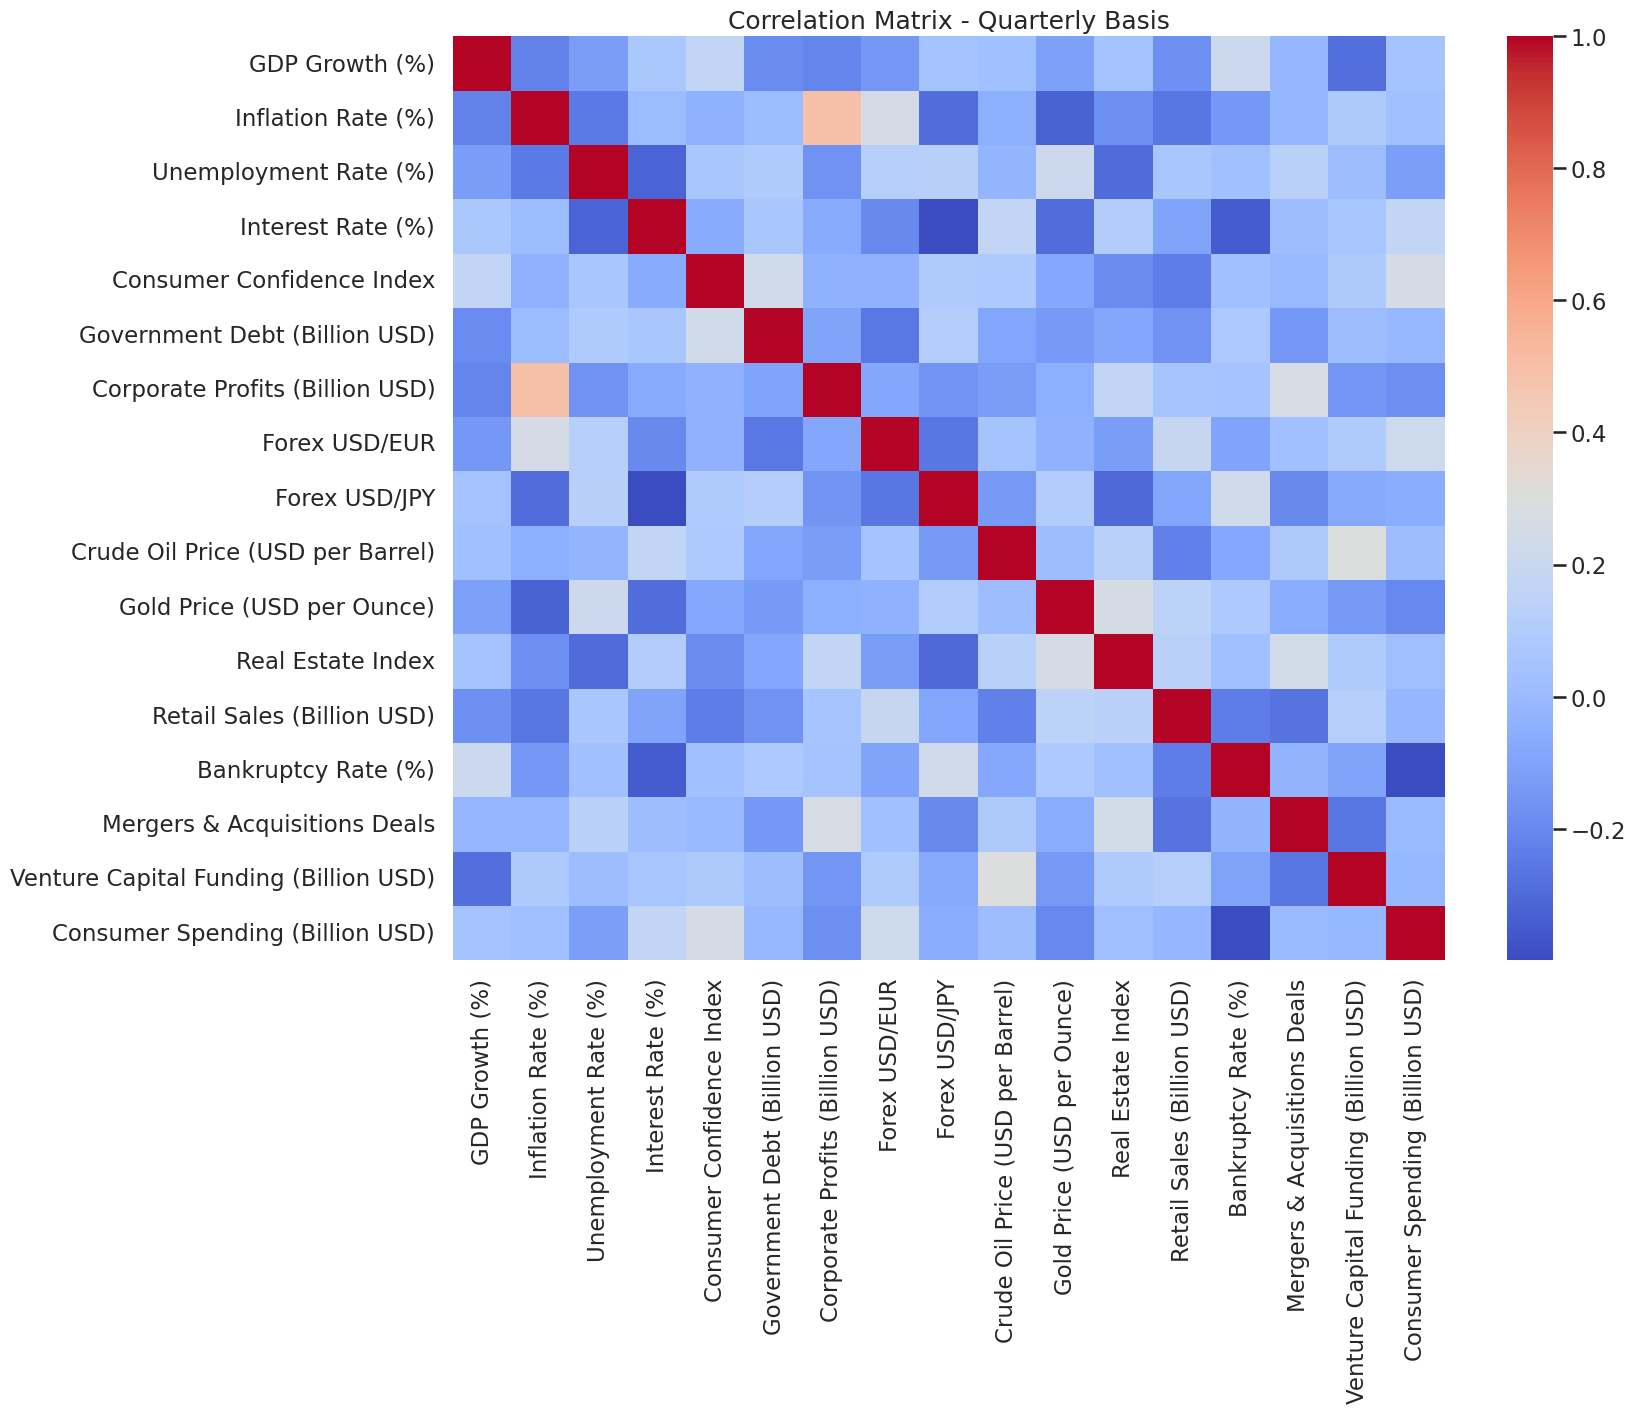

In [32]:
# Creating a correlation matrix Quarterly basis
quarterly_avg = fe_df.resample('QE')[['GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)',
                           'Interest Rate (%)', 'Consumer Confidence Index', 
                            'Government Debt (Billion USD)', 
                            'Corporate Profits (Billion USD)', 'Forex USD/EUR', 'Forex USD/JPY', 
                            'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)', 
                            'Real Estate Index', 'Retail Sales (Billion USD)', 
                            'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals', 
                            'Venture Capital Funding (Billion USD)', 
                            'Consumer Spending (Billion USD)']].mean().reset_index()

correlation_matrix_quarterly = quarterly_avg[['GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)',
                           'Interest Rate (%)', 'Consumer Confidence Index', 
                            'Government Debt (Billion USD)', 
                            'Corporate Profits (Billion USD)', 'Forex USD/EUR', 'Forex USD/JPY', 
                            'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)', 
                            'Real Estate Index', 'Retail Sales (Billion USD)', 
                            'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals', 
                            'Venture Capital Funding (Billion USD)', 
                            'Consumer Spending (Billion USD)']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix_quarterly, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Quarterly Basis')
plt.show()

### Strongest Correlation Pair (Positive & Negative)

#### Monthly

In [69]:
# to find the strongest pair (excluding self-correlations)

corr_unstacked_monthly = correlation_matrix_monthly.unstack().sort_values(ascending=False)
# flattened matrix became Series — where the row and column labels became a pair of index levels.

# drop self-correlations
corr_unstacked_monthly = corr_unstacked_monthly[corr_unstacked_monthly < 1]
corr_unstacked_monthly

Real Estate Index                      Gold Price (USD per Ounce)               0.215172
Gold Price (USD per Ounce)             Real Estate Index                        0.215172
Crude Oil Price (USD per Barrel)       Venture Capital Funding (Billion USD)    0.206569
Venture Capital Funding (Billion USD)  Crude Oil Price (USD per Barrel)         0.206569
Real Estate Index                      Venture Capital Funding (Billion USD)    0.188989
                                                                                  ...   
Gold Price (USD per Ounce)             Crude Oil Price (USD per Barrel)        -0.200918
                                       Inflation Rate (%)                      -0.211502
Inflation Rate (%)                     Gold Price (USD per Ounce)              -0.211502
GDP Growth (%)                         Venture Capital Funding (Billion USD)   -0.224944
Venture Capital Funding (Billion USD)  GDP Growth (%)                          -0.224944
Length: 272, dtype: f

In [71]:
# get the top one
top_pair = corr_unstacked_monthly.index[0]
top_value = corr_unstacked_monthly.max()

print("Highest correlation is between:", top_pair)
print("Correlation value:", round(top_value, 2))

Highest correlation is between: ('Real Estate Index', 'Gold Price (USD per Ounce)')
Correlation value: 0.22


<Axes: xlabel='Date', ylabel='Real Estate Index'>

Text(0, 0.5, 'Real Estate Index')

<Axes: xlabel='Date', ylabel='Gold Price (USD per Ounce)'>

Text(0, 0.5, 'Gold Price (USD per Ounce)')

Text(0.5, 1.0, 'Real Estate Index and Gold Price (USD per Ounce)')

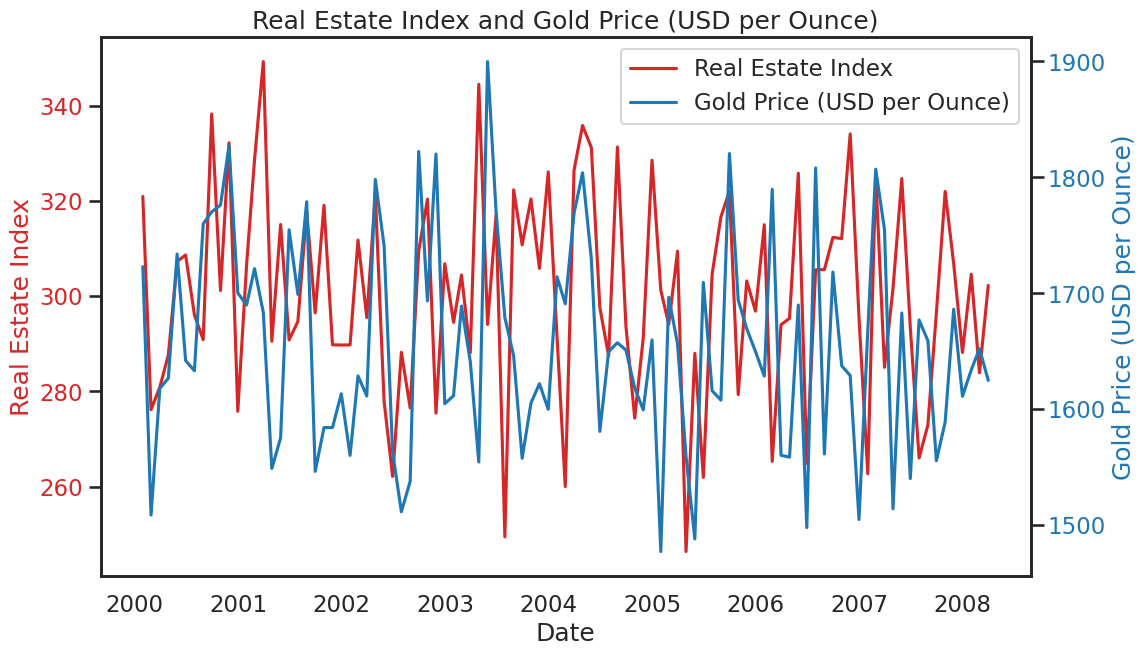

In [74]:
# Create lineplot of this pair to see the trend

# Inflation Rate
monthly_estate_avg = fe_df.resample('ME')["Real Estate Index"].mean().reset_index()
# Corporate Profits
monthly_gold_price_avg = fe_df.resample('ME')["Gold Price (USD per Ounce)"].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(12, 7))

sns.lineplot(x="Date", y='Real Estate Index', data=monthly_estate_avg,
             ax=ax1, color="tab:red", label="Real Estate Index", legend=False)
ax1.set_ylabel("Real Estate Index", color="tab:red")
ax1.tick_params(axis='y', labelcolor="tab:red")


ax2 = ax1.twinx()
sns.lineplot(x="Date", y='Gold Price (USD per Ounce)', data=monthly_gold_price_avg, 
             ax=ax2, color="tab:blue", label="Gold Price (USD per Ounce)")
ax2.set_ylabel("Gold Price (USD per Ounce)", color="tab:blue")
ax2.tick_params(axis='y', labelcolor="tab:blue")

plt.title("Real Estate Index and Gold Price (USD per Ounce)")

#combine both legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper right")

plt.show()

In [76]:
# get the last one
bot_pair = corr_unstacked_monthly.index[-1]
bot_value = corr_unstacked_monthly.min()

print("Highest correlation is between:", bot_pair)
print("Correlation value:", round(bot_value, 2))

Highest correlation is between: ('Venture Capital Funding (Billion USD)', 'GDP Growth (%)')
Correlation value: -0.22


<Axes: xlabel='Date', ylabel='Venture Capital Funding (Billion USD)'>

Text(0, 0.5, 'Venture Capital Funding (Billion USD)')

<Axes: xlabel='Date', ylabel='GDP Growth (%)'>

Text(0, 0.5, 'GDP Growth (%)')

Text(0.5, 1.0, 'Venture Capital Funding (Billion USD) and GDP Growth (%)')

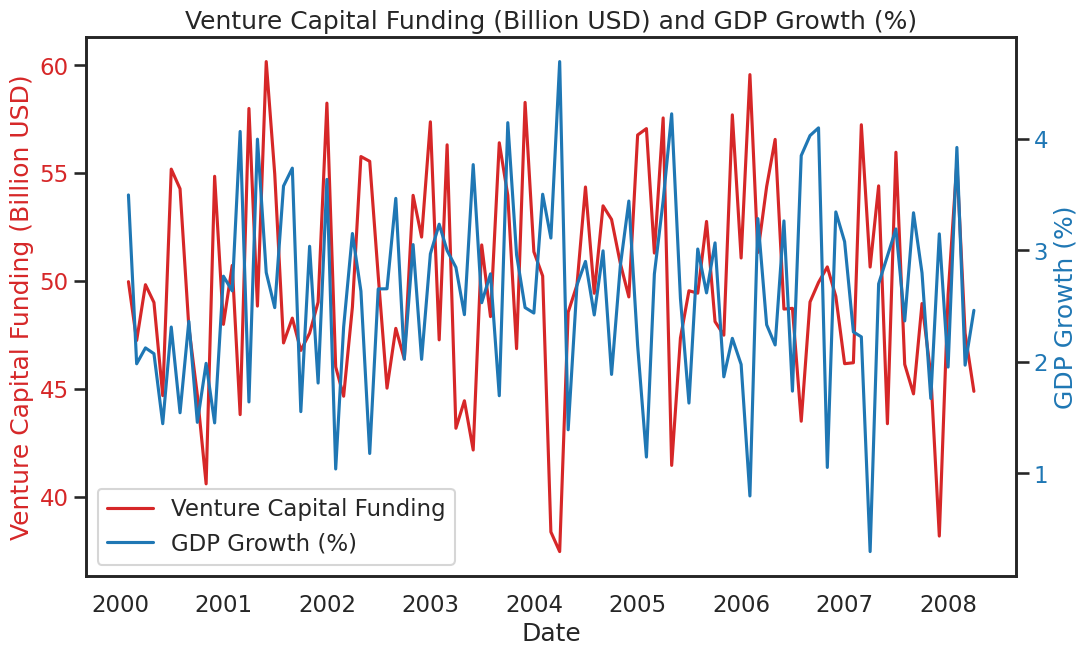

In [80]:
# Create lineplot of this pair to see the trend

# Inflation Rate
monthly_VC_avg = fe_df.resample('ME')["Venture Capital Funding (Billion USD)"].mean().reset_index()
# Corporate Profits
monthly_gdp_avg = fe_df.resample('ME')["GDP Growth (%)"].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(12, 7))

sns.lineplot(x="Date", y='Venture Capital Funding (Billion USD)', data=monthly_VC_avg,
             ax=ax1, color="tab:red", label="Venture Capital Funding", legend=False)
ax1.set_ylabel("Venture Capital Funding (Billion USD)", color="tab:red")
ax1.tick_params(axis='y', labelcolor="tab:red")


ax2 = ax1.twinx()
sns.lineplot(x="Date", y='GDP Growth (%)', data=monthly_gdp_avg, 
             ax=ax2, color="tab:blue", label="GDP Growth (%)")
ax2.set_ylabel("GDP Growth (%)", color="tab:blue")
ax2.tick_params(axis='y', labelcolor="tab:blue")

plt.title("Venture Capital Funding (Billion USD) and GDP Growth (%)")

#combine both legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="lower left")

plt.show()

#### Quarterly

In [45]:
# to find the strongest pair (excluding self-correlations)

corr_unstacked = correlation_matrix_quarterly.unstack().sort_values(ascending=False)
# flattened matrix became Series — where the row and column labels became a pair of index levels.

# drop self-correlations
corr_unstacked = corr_unstacked[corr_unstacked < 1]
corr_unstacked

Inflation Rate (%)                     Corporate Profits (Billion USD)          0.496213
Corporate Profits (Billion USD)        Inflation Rate (%)                       0.496213
Venture Capital Funding (Billion USD)  Crude Oil Price (USD per Barrel)         0.296437
Crude Oil Price (USD per Barrel)       Venture Capital Funding (Billion USD)    0.296437
Corporate Profits (Billion USD)        Mergers & Acquisitions Deals             0.262539
                                                                                  ...   
Bankruptcy Rate (%)                    Interest Rate (%)                       -0.347524
Consumer Spending (Billion USD)        Bankruptcy Rate (%)                     -0.397293
Bankruptcy Rate (%)                    Consumer Spending (Billion USD)         -0.397293
Interest Rate (%)                      Forex USD/JPY                           -0.399637
Forex USD/JPY                          Interest Rate (%)                       -0.399637
Length: 272, dtype: f

In [46]:
# get the top one
top_pair = corr_unstacked.index[0]
top_value = corr_unstacked.max()

print("Highest correlation is between:", top_pair)
print("Correlation value:", round(top_value, 2))

Highest correlation is between: ('Inflation Rate (%)', 'Corporate Profits (Billion USD)')
Correlation value: 0.5


<Axes: xlabel='Date', ylabel='Inflation Rate (%)'>

Text(0, 0.5, 'Inflation Rate (%)')

<Axes: xlabel='Date', ylabel='Corporate Profits (Billion USD)'>

Text(0, 0.5, 'Corporate Profits (Billion USD)')

Text(0.5, 1.0, 'Quarterly Inflation Rate (%) and Corporate Profits (Billion USD)')

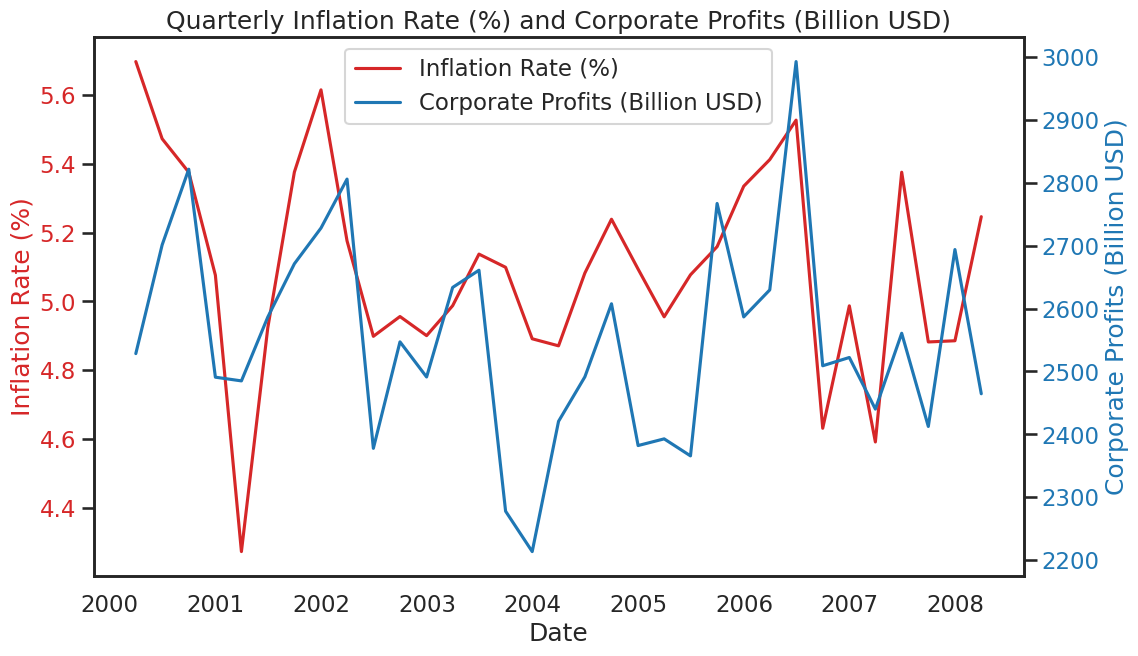

In [62]:
# Create lineplot of this pair to see the trend

# Inflation Rate
quarterly_inflation_avg = fe_df.resample('QE')["Inflation Rate (%)"].mean().reset_index()
# Corporate Profits
quarterly_Corp_profit_avg = fe_df.resample('QE')["Corporate Profits (Billion USD)"].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(12, 7))

sns.lineplot(x="Date", y='Inflation Rate (%)', data=quarterly_inflation_avg,
             ax=ax1, color="tab:red", label="Inflation Rate (%)", legend=False)
ax1.set_ylabel("Inflation Rate (%)", color="tab:red")
ax1.tick_params(axis='y', labelcolor="tab:red")


ax2 = ax1.twinx()
sns.lineplot(x="Date", y='Corporate Profits (Billion USD)', data=quarterly_Corp_profit_avg, 
             ax=ax2, color="tab:blue", label="Corporate Profits (Billion USD)")
ax2.set_ylabel("Corporate Profits (Billion USD)", color="tab:blue")
ax2.tick_params(axis='y', labelcolor="tab:blue")

plt.title("Quarterly Inflation Rate (%) and Corporate Profits (Billion USD)")

#combine both legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper center")

plt.show()

In [47]:
# to find the strongest negative correlation pair (excluding self-correlations) 

# get the last one
bot_pair = corr_unstacked.iloc[-1]
bot_value = corr_unstacked.min()

print("Highest correlation is between:", bot_pair)
print("Correlation value:", round(bot_value, 2))

Highest correlation is between: ('Forex USD/JPY', 'Interest Rate (%)')
Correlation value: -0.4


<Axes: xlabel='Date', ylabel='Forex USD/JPY'>

Text(0, 0.5, 'Forex USD/JPY')

<Axes: xlabel='Date', ylabel='Interest Rate (%)'>

Text(0, 0.5, 'Interest Rate (%)')

Text(0.5, 1.0, 'Quarterly Forex USD/JPY and Interest Rate (%)')

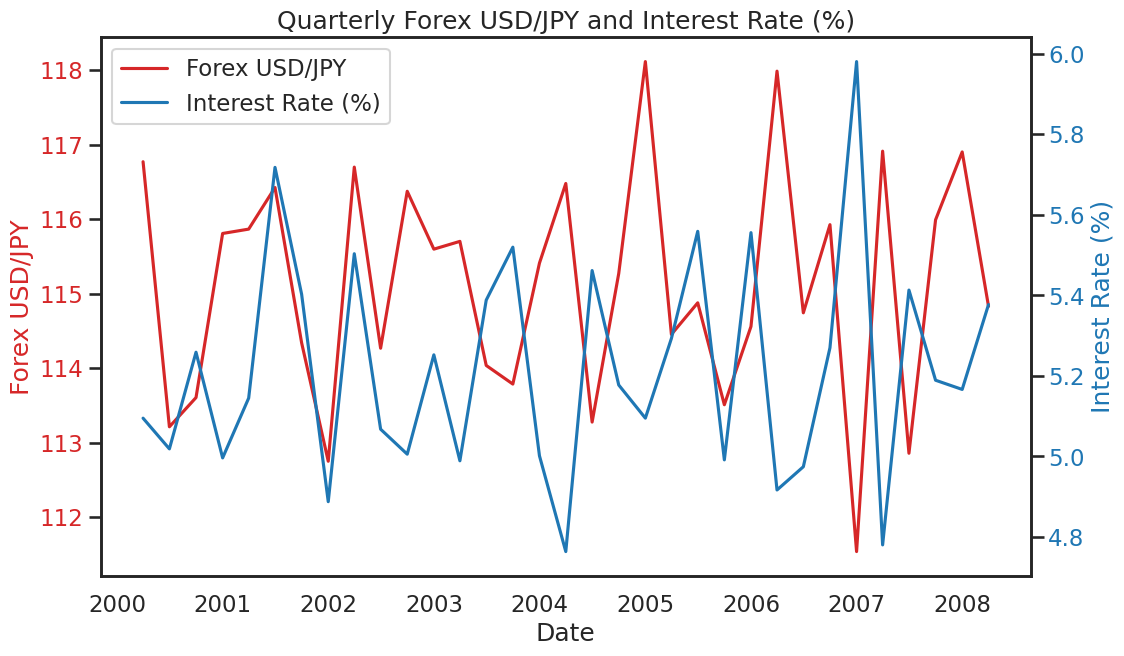

In [64]:
# Create lineplot of this pair to see the trend

# Inflation Rate
quarterly_USD_JPY_avg = fe_df.resample('QE')["Forex USD/JPY"].mean().reset_index()
# Corporate Profits
quarterly_interest_avg = fe_df.resample('QE')["Interest Rate (%)"].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(12, 7))

sns.lineplot(x="Date", y='Forex USD/JPY', data=quarterly_USD_JPY_avg,
             ax=ax1, color="tab:red", label="Forex USD/JPY", legend=False)
ax1.set_ylabel("Forex USD/JPY", color="tab:red")
ax1.tick_params(axis='y', labelcolor="tab:red")


ax2 = ax1.twinx()
sns.lineplot(x="Date", y='Interest Rate (%)', data=quarterly_interest_avg, 
             ax=ax2, color="tab:blue", label="Interest Rate (%)")
ax2.set_ylabel("Interest Rate (%)", color="tab:blue")
ax2.tick_params(axis='y', labelcolor="tab:blue")

plt.title("Quarterly Forex USD/JPY and Interest Rate (%)")

#combine both legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper left")

plt.show()